In [1]:
import pandas as pd

pd.set_option('display.max_columns', 100)

df_mod = pd.read_parquet('../../../data/model_data/model_data_single_output.parquet')

df_mod = df_mod.loc[df_mod['Position'] == 'WR', :].reset_index(drop=True)

df_mod

,Season,Week,Name,Position,Team,Fantasy Points,Rank,Position Rank,Adjusted Passing Yards Projection,Adjusted Passing Touchdowns Projection,Adjusted Interceptions Projection,Adjusted Rushing Yards Projection,Adjusted Receiving Yards Projection,Adjusted Receptions Projection,Anytime Touchdown Probability,Location,Team Projected Score,Opponent Projected Score
0,2020,1,michael thomas,WR,NO,3.2,21.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,26.25,22.25
1,2020,1,davante adams,WR,GB,34.6,33.0,2,NaN,NaN,NaN,NaN,87.500000,7.466125,0.476190,-1.0,21.50,23.00
2,2020,1,julio jones,WR,ATL,20.2,36.0,3,NaN,NaN,NaN,NaN,92.500000,6.544513,0.476190,1.0,NaN,NaN
3,2020,1,tyreek hill,WR,KC,13.1,37.0,4,NaN,NaN,NaN,NaN,74.500000,5.442461,0.565217,1.0,31.50,22.00
4,2020,1,chris godwin,WR,TB,10.9,45.0,5,NaN,NaN,NaN,NaN,70.500000,5.548948,0.444444,-1.0,22.25,26.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,2023,17,equanimeous st,WR,CHI,0.0,266.0,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.75,18.25
6041,2023,17,van jefferson,WR,ATL,3.4,270.0,112,NaN,NaN,NaN,NaN,11.488149,1.339031,0.125000,-1.0,18.25,20.75
6042,2023,17,julio jones,WR,PHI,16.4,272.0,113,NaN,NaN,NaN,NaN,8.500000,1.343000,0.100000,1.0,30.25,17.75
6043,2023,17,khadarel hodge,WR,ATL,0.0,297.0,119,NaN,NaN,NaN,NaN,8.500000,0.640297,0.083333,-1.0,18.25,20.75


In [2]:
X = df_mod[[
    'Rank',
    'Position Rank',
    'Location',
    'Team Projected Score',
    'Opponent Projected Score',
    'Adjusted Receptions Projection',
    'Adjusted Receiving Yards Projection',
    'Adjusted Rushing Yards Projection',
    'Anytime Touchdown Probability',
]].copy()

X

,Rank,Position Rank,Location,Team Projected Score,Opponent Projected Score,Adjusted Receptions Projection,Adjusted Receiving Yards Projection,Adjusted Rushing Yards Projection,Anytime Touchdown Probability
0,21.0,1,1.0,26.25,22.25,NaN,NaN,NaN,NaN
1,33.0,2,-1.0,21.50,23.00,7.466125,87.500000,NaN,0.476190
2,36.0,3,1.0,NaN,NaN,6.544513,92.500000,NaN,0.476190
3,37.0,4,1.0,31.50,22.00,5.442461,74.500000,NaN,0.565217
4,45.0,5,-1.0,22.25,26.25,5.548948,70.500000,NaN,0.444444
...,...,...,...,...,...,...,...,...,...
6040,266.0,110,1.0,20.75,18.25,NaN,NaN,NaN,NaN
6041,270.0,112,-1.0,18.25,20.75,1.339031,11.488149,NaN,0.125000
6042,272.0,113,1.0,30.25,17.75,1.343000,8.500000,NaN,0.100000
6043,297.0,119,-1.0,18.25,20.75,0.640297,8.500000,NaN,0.083333


In [3]:
points_rounded = df_mod['Fantasy Points'].round().astype(int)

points_rounded

0        3
1       35
2       20
3       13
4       11
        ..
6040     0
6041     3
6042    16
6043     0
6044     0
Name: Fantasy Points, Length: 6045, dtype: int32

In [4]:
import numpy as np

# first column: -5 points scored
# last column: 55 points scored
y = np.zeros(shape=(points_rounded.shape[0], 60))

for i in range(y.shape[0]):
    y[i, points_rounded.iloc[i] + 4] = 1

y = pd.DataFrame(
    y,
    columns=[f"{i - 4} Fantasy Points" for i in range(y.shape[1])]
)

y

,-4 Fantasy Points,-3 Fantasy Points,-2 Fantasy Points,-1 Fantasy Points,0 Fantasy Points,1 Fantasy Points,2 Fantasy Points,3 Fantasy Points,4 Fantasy Points,5 Fantasy Points,6 Fantasy Points,7 Fantasy Points,8 Fantasy Points,9 Fantasy Points,10 Fantasy Points,11 Fantasy Points,12 Fantasy Points,13 Fantasy Points,14 Fantasy Points,15 Fantasy Points,16 Fantasy Points,17 Fantasy Points,18 Fantasy Points,19 Fantasy Points,20 Fantasy Points,21 Fantasy Points,22 Fantasy Points,23 Fantasy Points,24 Fantasy Points,25 Fantasy Points,26 Fantasy Points,27 Fantasy Points,28 Fantasy Points,29 Fantasy Points,30 Fantasy Points,31 Fantasy Points,32 Fantasy Points,33 Fantasy Points,34 Fantasy Points,35 Fantasy Points,36 Fantasy Points,37 Fantasy Points,38 Fantasy Points,39 Fantasy Points,40 Fantasy Points,41 Fantasy Points,42 Fantasy Points,43 Fantasy Points,44 Fantasy Points,45 Fantasy Points,46 Fantasy Points,47 Fantasy Points,48 Fantasy Points,49 Fantasy Points,50 Fantasy Points,51 Fantasy Points,52 Fantasy Points,53 Fantasy Points,54 Fantasy Points,55 Fantasy Points
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6043,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
groups = df_mod['Season'].astype(str) + ' Week ' + df_mod['Week'].astype(str)

groups

0        2020 Week 1
1        2020 Week 1
2        2020 Week 1
3        2020 Week 1
4        2020 Week 1
            ...     
6040    2023 Week 17
6041    2023 Week 17
6042    2023 Week 17
6043    2023 Week 17
6044    2023 Week 17
Length: 6045, dtype: object

In [6]:
df_folds = pd.read_parquet('../../../data/model_data/folds.parquet')

df_folds

,Fold ID,Season Week
0,0,2022 Week 3
1,0,2021 Week 7
2,0,2021 Week 1
3,0,2023 Week 16
4,0,2021 Week 11
...,...,...
62,2,2020 Week 15
63,2,2023 Week 14
64,2,2021 Week 5
65,2,2022 Week 6


In [7]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pd.options.mode.chained_assignment = None

# splitter = GroupKFold(n_splits=3)

cv_data = []
# for is_indexes, oos_indexes in splitter.split(X=X, y=y, groups=groups):
for fold in df_folds['Fold ID'].unique():
    oos_season_week = df_folds.loc[df_folds['Fold ID'] == fold, 'Season Week']
    is_indexes = df_mod.loc[~groups.isin(oos_season_week), :].index
    oos_indexes = df_mod.loc[groups.isin(oos_season_week), :].index
    # split
    X_is = X.iloc[is_indexes]
    X_oos = X.iloc[oos_indexes]

    y_is = y.iloc[is_indexes]
    y_oos = y.iloc[oos_indexes]

    groups_is = groups.iloc[is_indexes]
    df_mod_oos = df_mod.iloc[oos_indexes]

    gss = GroupShuffleSplit(n_splits=1, test_size=0.15, random_state=22)
    for train_indexes, val_indexes in gss.split(X=X_is, y=y_is, groups=groups_is):
            X_train = X_is.iloc[train_indexes]
            X_val = X_is.iloc[val_indexes]

            y_train = y_is.iloc[train_indexes]
            y_val = y_is.iloc[val_indexes]

    # impute
    scaler = StandardScaler()
    imputer = IterativeImputer(initial_strategy='median', max_iter=100)

    X_train_fill_na = imputer.fit_transform(scaler.fit_transform(X_train))
    X_train[X_train.columns] = scaler.inverse_transform(X_train_fill_na).copy()
    X_train['Prop Bets Projection'] = (
        X_train['Adjusted Receiving Yards Projection']*0.1 + 
        X_train['Adjusted Receptions Projection']*0.5 + 
        X_train['Adjusted Rushing Yards Projection']*0.1 +
        X_train['Anytime Touchdown Probability']*6
    )

    scaler2 = MinMaxScaler(clip=True)  # maybe normalize and clip instead of standardize?
    scaler3 = StandardScaler()
    X_train[X_train.columns] = scaler3.fit_transform(scaler2.fit_transform(X_train)).copy()

    X_val_fill_na = imputer.transform(scaler.transform(X_val))
    X_val[X_val.columns] = scaler.inverse_transform(X_val_fill_na).copy()
    X_val['Prop Bets Projection'] = (
        X_val['Adjusted Receiving Yards Projection']*0.1 + 
        X_val['Adjusted Receptions Projection']*0.5 + 
        X_val['Adjusted Rushing Yards Projection']*0.1 +
        X_val['Anytime Touchdown Probability']*6
    )

    X_val[X_val.columns] = scaler3.transform(scaler2.transform(X_val)).copy()

    X_oos_fill_na = imputer.transform(scaler.transform(X_oos))
    X_oos[X_oos.columns] = scaler.inverse_transform(X_oos_fill_na).copy()
    X_oos['Prop Bets Projection'] = (
        X_oos['Adjusted Receiving Yards Projection']*0.1 + 
        X_oos['Adjusted Receptions Projection']*0.5 + 
        X_oos['Adjusted Rushing Yards Projection']*0.1 +
        X_oos['Anytime Touchdown Probability']*6
    )

    X_oos[X_oos.columns] = scaler3.transform(scaler2.transform(X_oos)).copy()

    X_train.drop(columns=['Adjusted Receiving Yards Projection', 'Adjusted Receptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)
    X_val.drop(columns=['Adjusted Receiving Yards Projection', 'Adjusted Receptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)
    X_oos.drop(columns=['Adjusted Receiving Yards Projection', 'Adjusted Receptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)

    cv_data.append((X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos))

for X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos in cv_data:
    print(X_train.shape, X_val.shape, X_oos.shape, y_train.shape, y_val.shape, y_oos.shape, df_mod_oos.shape)

c:\Users\mhugh\anaconda3\envs\clean2\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


(3316, 6) (648, 6) (2081, 6) (3316, 60) (648, 60) (2081, 60) (2081, 18)
(3466, 6) (636, 6) (1943, 6) (3466, 60) (636, 60) (1943, 60) (1943, 18)
(3412, 6) (612, 6) (2021, 6) (3412, 60) (612, 60) (2021, 60) (2021, 18)


In [8]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.config.experimental import enable_op_determinism
from tensorflow.random import set_seed
import numpy as np
import os

os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

def build_and_compile_model(input_shape: tuple, output_shape: int, hidden_layer_neurons: list, l1s: list, l2s: list, learning_rate: float):
    enable_op_determinism()
    set_seed(22)
    
    inputs = Input(shape=input_shape, name='input')

    h = inputs
    for i, neurons in enumerate(hidden_layer_neurons):
        h = Dense(
            neurons, 
            activation='relu', 
            kernel_initializer=GlorotNormal(seed=22), 
            kernel_regularizer=L1L2(l1=l1s[i], l2=l2s[i]), 
            name=f"hidden_{i+1}"
        )(h)

    outputs = Dense(output_shape, activation='softmax', kernel_initializer=GlorotNormal(seed=22), name='outputs')(h)

    mod = Model(inputs=inputs, outputs=outputs)

    mod.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return mod

mod = build_and_compile_model(X.shape[1:], y.shape[1], [128, 32], [0, 0.01], [0, 0.01], learning_rate=0.001)

mod.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 9)]               0         
                                                                 
 hidden_1 (Dense)            (None, 128)               1280      
                                                                 
 hidden_2 (Dense)            (None, 32)                4128      
                                                                 
 outputs (Dense)             (None, 60)                1980      
                                                                 
Total params: 7,388
Trainable params: 7,388
Non-trainable params: 0
_________________________________________________________________


In [9]:
from sklearn.metrics import log_loss
import optuna

def objective(trial, cv_data=cv_data):
# model tuning
    n_hidden_layers = trial.suggest_int(f"n_hidden_layers", 1, 3)

    hidden_layer_neurons = []
    l1s = []
    l2s = []
    for i in range(n_hidden_layers):
        hidden_layer_neurons.append(trial.suggest_categorical(f"hidden_layer_{i+1}_neurons", [2**n for n in range(5, 12)]))  # change to (3, 12)
        # hidden_layer_neurons.append(trial.suggest_categorical(f"hidden_layer_{i+1}_neurons", [2**n for n in range(4, 9)]))  # bump this up
        l1s.append(trial.suggest_float(f"hidden_layer_{i+1}_l1", 0.0, 0.1))  # change to (0.0, 0.05)
        l2s.append(trial.suggest_float(f"hidden_layer_{i+1}_l2", 0.0, 0.1))  # change to (0.0, 0.20)

    learning_rate = trial.suggest_float(f"learning_rate", 0.01, 0.10)
    batch_size = trial.suggest_categorical(f"batch_size", [2**n for n in range(10, 16)])
    # batch_size = trial.suggest_categorical(f"batch_size", [2**n for n in range(4, 12)])  # bump this up

    # cross validation
    y_oos_list = []
    y_pred_list = []
    for X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos in cv_data:
        # make sure to build mod in loop to prevent history
        mod = build_and_compile_model(X_train.shape[1:], y_train.shape[1], hidden_layer_neurons, l1s, l2s, learning_rate)

        mod.fit(
            X_train,
            y_train,
            validation_data=(X_val, y_val),
            batch_size=batch_size,
            epochs=500,
            callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
            verbose=0,
        )

        y_oos_list.append(y_oos)
        y_pred_list.append(mod.predict(X_oos, verbose=0))


    y_oos_concat = np.vstack(y_oos_list)
    y_pred_concat = np.vstack(y_pred_list)

    print(y_oos_concat.shape, y_pred_concat.shape)

    return log_loss(y_oos_concat, y_pred_concat)

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22, n_startup_trials=10, multivariate=True, warn_independent_sampling=False))
study.optimize(objective, n_trials=20, show_progress_bar=True)

study.best_params

c:\Users\mhugh\anaconda3\envs\clean2\lib\site-packages\optuna\_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-10-22 14:09:17,185] A new study created in memory with name: no-name-1e24d67c-0826-43d2-a0e6-8b91896d1e18


  0%|          | 0/20 [00:00<?, ?it/s]

(6045, 60) (6045, 60)
[I 2024-10-22 14:09:40,198] Trial 0 finished with value: 3.004247035675998 and parameters: {'n_hidden_layers': 1, 'hidden_layer_1_neurons': 128, 'hidden_layer_1_l1': 0.022040451663772567, 'hidden_layer_1_l2': 0.08119509205386867, 'learning_rate': 0.01094741868844976, 'batch_size': 2048}. Best is trial 0 with value: 3.004247035675998.
(6045, 60) (6045, 60)
[I 2024-10-22 14:09:49,079] Trial 1 finished with value: 3.152605730706732 and parameters: {'n_hidden_layers': 3, 'hidden_layer_1_neurons': 128, 'hidden_layer_1_l1': 0.058428964315689495, 'hidden_layer_1_l2': 0.07026355188654519, 'hidden_layer_2_neurons': 128, 'hidden_layer_2_l1': 0.08749277452777171, 'hidden_layer_2_l2': 0.07449320773686179, 'hidden_layer_3_neurons': 256, 'hidden_layer_3_l1': 0.009588460991804116, 'hidden_layer_3_l2': 0.004521011190769353, 'learning_rate': 0.07163458468004151, 'batch_size': 1024}. Best is trial 0 with value: 3.004247035675998.
(6045, 60) (6045, 60)
[I 2024-10-22 14:10:00,504] Tr

{'n_hidden_layers': 1,
 'hidden_layer_1_neurons': 64,
 'hidden_layer_1_l1': 0.01780491272493378,
 'hidden_layer_1_l2': 0.05000032388937394,
 'learning_rate': 0.05953877754661728,
 'batch_size': 2048}

3.002567607380726

In [10]:
n_hidden_layers = study.best_params['n_hidden_layers']

hidden_layer_neurons = []
l1s = []
l2s = []
for i in range(n_hidden_layers):
    hidden_layer_neurons.append(study.best_params[f"hidden_layer_{i+1}_neurons"])
    l1s.append(study.best_params[f"hidden_layer_{i+1}_l1"])
    l2s.append(study.best_params[f"hidden_layer_{i+1}_l2"])

learning_rate = study.best_params[f"learning_rate"]
batch_size = study.best_params[f"batch_size"]

y_oos_list = []
y_pred_list = []
testing_data = []
for X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos in cv_data:
    # make sure to build mod in loop to prevent history
    mod = build_and_compile_model(X_train.shape[1:], y_train.shape[1], hidden_layer_neurons, l1s, l2s, learning_rate)

    mod.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=500,
        callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
        verbose=1,
    )

    y_preds = mod.predict(X_oos, verbose=0)

    df_preds = pd.DataFrame(
        y_preds,
        columns=y.columns
    )

    testing_data.append(pd.concat((df_mod_oos.reset_index(drop=True), df_preds), axis=1))


    y_oos_list.append(y_oos)
    y_pred_list.append(y_preds)

df_test = pd.concat(testing_data, ignore_index=True)

y_oos_concat = np.vstack(y_oos_list)
y_pred_concat = np.vstack(y_pred_list)

print(f"OOS Log Loss: {log_loss(y_oos_concat, y_pred_concat)}")

Epoch 1/500
2/2 [==============================] - 1s 390ms/step - loss: 5.2415 - accuracy: 0.0443 - val_loss: 3.9549 - val_accuracy: 0.0772
Epoch 2/500
2/2 [==============================] - 0s 44ms/step - loss: 3.7985 - accuracy: 0.0890 - val_loss: 3.4690 - val_accuracy: 0.0880
Epoch 3/500
2/2 [==============================] - 0s 48ms/step - loss: 3.4439 - accuracy: 0.0959 - val_loss: 3.4550 - val_accuracy: 0.1127
Epoch 4/500
2/2 [==============================] - 0s 50ms/step - loss: 3.4109 - accuracy: 0.1089 - val_loss: 3.4471 - val_accuracy: 0.1389
Epoch 5/500
2/2 [==============================] - 0s 51ms/step - loss: 3.3973 - accuracy: 0.1065 - val_loss: 3.3846 - val_accuracy: 0.1389
Epoch 6/500
2/2 [==============================] - 0s 50ms/step - loss: 3.3330 - accuracy: 0.1152 - val_loss: 3.2855 - val_accuracy: 0.1173
Epoch 7/500
2/2 [==============================] - 0s 52ms/step - loss: 3.2539 - accuracy: 0.1089 - val_loss: 3.2310 - val_accuracy: 0.1219
Epoch 8/500
2/2 [==

In [11]:
def get_random_distribution(row):
    distribution = row[[f"{i} Fantasy Points" for i in range(-4, 56)]].astype('float64')/row[[f"{i} Fantasy Points" for i in range(-4, 56)]].astype('float64').sum()

    return np.random.choice([i for i in range(-4, 56)], p=distribution, size=1_000)

# get_random_distribution(df_test.iloc[1])

In [12]:
(df_test['Fantasy Points'] < 0).mean()

0.002315963606286187

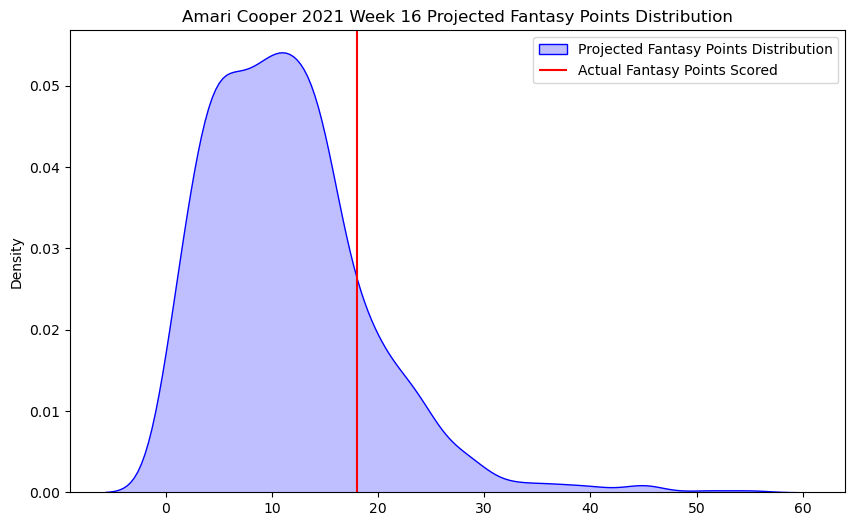

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(22)

row = df_test.iloc[1_000]

plt.figure(figsize=(10, 6))

random_distribution = get_random_distribution(row)

ax = sns.kdeplot(random_distribution, fill=True, bw_adjust=1.0, color='blue', label='Projected Fantasy Points Distribution')

current_limits = ax.get_ylim()

plt.vlines(x=row['Fantasy Points'], ymin=0.0, ymax=1.0, colors=['red'], label='Actual Fantasy Points Scored')

ax.set_ylim(current_limits)

plt.title(f"{row['Name'].title()} {row['Season']} Week {row['Week']} Projected Fantasy Points Distribution")

plt.legend()

plt.show()

In [14]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(
    df_test['Fantasy Points'],
    np.dot(np.array([i for i in range(-4, 56)]), df_test[[f"{i} Fantasy Points" for i in range(-4, 56)]].transpose()),
)

6.162127967261144

In [15]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(
    df_test['Fantasy Points'],
    np.dot(np.array([i for i in range(-4, 56)]), df_test[[f"{i} Fantasy Points" for i in range(-4, 56)]].transpose()),
)

4.7809453786688625

How often do players end up in certain percentiles?

In [16]:
percentiles = [(df_test.iloc[i]['Fantasy Points'] > get_random_distribution(df_test.iloc[i])).mean() for i in range(df_test.shape[0])]

len(percentiles)

6045

<Axes: ylabel='Count'>

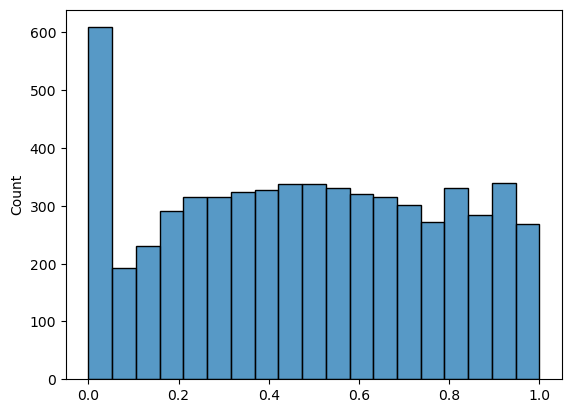

In [17]:
sns.histplot(
    x=percentiles,
)

In [18]:
pd.Series(percentiles).describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    6045.000000
mean        0.484159
std         0.295456
min         0.000000
1%          0.000000
5%          0.000000
10%         0.050000
25%         0.242000
50%         0.485000
75%         0.734000
90%         0.895000
95%         0.943000
99%         0.987000
max         1.000000
dtype: float64